In [1]:
# %load calibracion_automatica2.py
import os
#ruta = os.getcwd() + '/'
ruta = 'F:/Proyectos/GESDIVAH/Pruebas_TETIS/TETIS/desagregar/sintetico/1276-Cares/SSH-0.6/'
#src = os.path.abspath(os.path.join(ruta , '..'))
src = 'F:/Proyectos/GESDIVAH/Pruebas_TETIS/TETIS/desagregar/sintetico/1276-Cares/'
import numpy as np
import pandas as pd
import sys
from shutil import copyfile
sys.path.insert(0, 'F:\\Codigo\\Python\\TETIS')
from funciones_resultados_TETIS import leer_caudal, leer_SCEUA, NSE, sesgo, RMSE, KGE
from funciones_calibracion_TETIS import crear_tet, crear_calib, lanzar_SCEUA

In [2]:
# leer el archivo de configuración
#os.chdir(ruta)
#with open(ruta + 'Config.txt', 'r') as config:
    #conf = config.readlines()
#config.close()
#conf = [line.split()[0] for line in conf]
#stn, scn, met, calib_orig, start, OF = conf[0], conf[1], conf[2], conf[3], conf[4], conf[5]
#del conf
stn, scn, met, calib_orig, start, OF = '1276', 'SSH-0.6', 'met2', 'Calib_met0_median_total.txt', 6, 365

In [3]:
# Importar archivo de calibración de partida
calib = pd.read_csv(ruta + '/'  + calib_orig, header=None)
idx = ['FC' + str(i) for i in range(1, 10)] + ['FC0', 'Bnieve', 'DDF1', 'DDF2', 'Tb', 'Bppt', 'USLE1', 'USLE2', 'USLE3', 'p1', 'H3max']
calib.index = idx
calib = calib[0]
# convertir en NaN los parametros a calibrar
par_cal = ['FC3', 'FC4', 'FC5', 'FC6', 'FC7', 'FC8', 'FC9', 'H3max']
calib[par_cal] = np.NaN

In [11]:
############
# MÉTODO 1 #
############
if met == 'met1':
    print('############')
    print('# MÉTODO 1 #')
    print('############')
    
    # Paso 1. Crear archivos del modelo
    # ---------------------------------
    crear_tet(ruta, stn, scn, met, flow='total')
    
    # Paso 2. Calibrar el caudal total
    # --------------------------------
    print('CALIBRACIÓN DEL CAUDAL TOTAL')
    print('----------------------------')
    # Definir parámetros del modelo
    crear_calib(calib, ruta, 'total', met)
    # Crear archivo de configuración de la calibración automática
    #crear_VarSCEUA(par_cal, ruta, 'total', met, start=start, OF=OF)
    varfile = 'Var-SCEUA_total_' + met + '.txt'
    copyfile(src + '/' + varfile, ruta + '/' + varfile)
    # Lanzar la calibración automática
    lanzar_SCEUA(ruta, 'total', met, scn)
    try:
        calib = lanzar_SCEUA.calib
        obs_total = lanzar_SCEUA.obs
        sim_total = lanzar_SCEUA.sim
    except:
        print('No fue posible simular')

In [24]:
      
############
# MÉTODO 2 #
############        
if met == 'met2':
    print('############')
    print('# MÉTODO 2 #')
    print('############')
    
    # Paso 1. Crear archvos del modelo
    # ---------------------------------
    crear_tet(ruta, stn, scn, met, flow='quick')
    crear_tet(ruta, stn, scn, met, flow='slow')
    crear_tet(ruta, stn, scn, met, flow='total')

############
# MÉTODO 2 #
############


In [31]:
    # Paso 2. Calibrar el caudal rápido
    # ---------------------------------
    print('CALIBRACIÓN DEL CAUDAL RÁPIDO')
    print('-----------------------------')
    # Definir parámetros del modelo
    crear_calib(calib, ruta, 'quick', met)
    # Crear archivo de configuración de la calibración automática
    #crear_VarSCEUA(par_cal, ruta, 'quick', met, start=start, OF=OF)
    varfile = 'Var-SCEUA_quick_' + met + '.txt'
    copyfile(src + '/' + varfile, ruta + '/' + varfile)
    

CALIBRACIÓN DEL CAUDAL RÁPIDO
-----------------------------


'F:/Proyectos/GESDIVAH/Pruebas_TETIS/TETIS/desagregar/sintetico/1276-Cares/SSH-0.6//Var-SCEUA_quick_met2.txt'

In [ ]:
    # Lanzar la calibración automática
    lanzar_SCEUA(ruta, 'quick', met, scn)
    

NSE = 0.0407


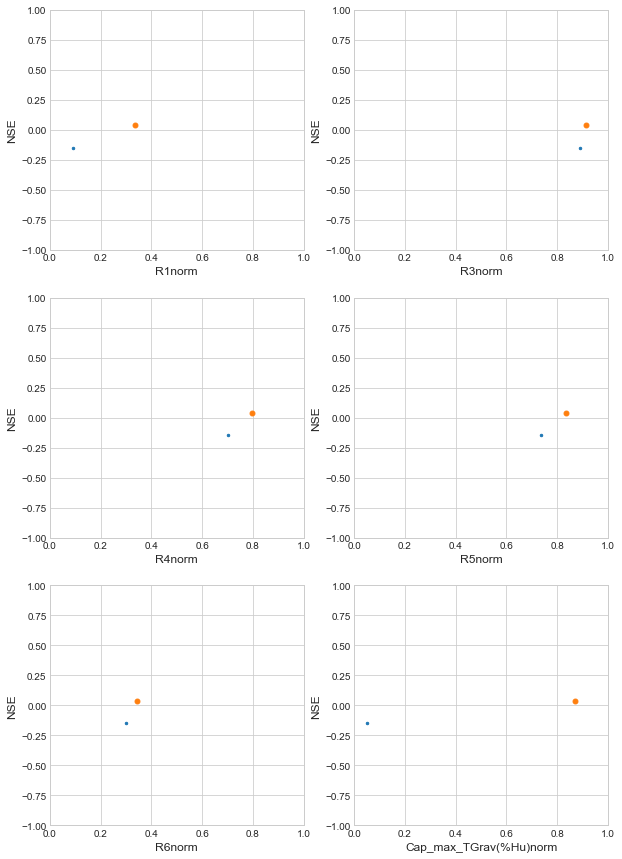

In [15]:
        # importar los valores calibrados de los parametros
        leer_SCEUA(ruta, 'Res-SCEUA_quick_' + met + '.txt')
        pars = leer_SCEUA.parametros
        print('NSE =', leer_SCEUA.resultados.Nash.max())
        # importar los archivos 'Calib.txt' originales
        calib = pd.read_csv(ruta + 'Calib_quick_' + met + '.txt', header=None)
        calib.index = ['FC' + str(i) for i in range(1, 10)] + ['FC0', 'Bnieve', 'DDF1', 'DDF2', 'Tb', 'Bppt', 'USLE1', 'USLE2', 'USLE3', 'p1', 'H3max']
        calib = calib[0]
        # modificar los valores de los parametros calibrados
        for FC in pars.index:
            if FC[0] == 'R':
                par_name = 'FC' + FC[1]
            elif FC[:3] == 'Cap':
                par_name = 'H3max'
            calib[par_name] = pars.loc[FC, 'optimo']
        # exportar el archivo 'Calib_'quick'.txt' modificado
        crear_calib(calib, ruta, 'quick', met)
        lanzar_SCEUA.calib = calib

In [17]:
    try:
        calib_quick = lanzar_SCEUA.calib
        #obs_quick = lanzar_SCEUA.obs
        #sim_quick = lanzar_SCEUA.sim
    except:
        print('No fue posible simular')
    print()
        

In [18]:
calib_quick

FC1            0.67736
FC2            0.69943
FC3            1.37299
FC4            7.95884
FC5            1.24904
FC6         1725.21399
FC7            1.00000
FC8            0.00000
FC9            1.00000
FC0            1.00000
Bnieve         1.00000
DDF1           2.97877
DDF2           4.75730
Tb             2.60240
Bppt           0.00096
USLE1          1.00000
USLE2          1.00000
USLE3          1.00000
p1             1.96174
H3max     871183.87500
Name: 0, dtype: float64

In [20]:
    # Paso 3. Calibrar el caudal lento
    # --------------------------------
    print('CALIBRACIÓN DEL CAUDAL LENTO')
    print('----------------------------')
    # Definir parámetros del modelo
    calib_slow = calib_quick.copy()
    calib_slow['FC8'] = np.nan # para dar el valor por defecto a 'FC8'
    crear_calib(calib_slow, ruta, 'slow', met)
    # Crear archivo de configuración de la calibración automática
    #crear_VarSCEUA(par_cal, ruta, 'slow', met, start=start, OF=OF)
    varfile = 'Var-SCEUA_slow_' + met + '.txt'
    copyfile(src + '/' + varfile, ruta + '/' + varfile)

CALIBRACIÓN DEL CAUDAL LENTO
----------------------------


'F:/Proyectos/GESDIVAH/Pruebas_TETIS/TETIS/desagregar/sintetico/1276-Cares/SSH-0.6//Var-SCEUA_slow_met2.txt'

In [ ]:
    # Lanzar la calibración automática
    lanzar_SCEUA(ruta, 'slow', met, scn)

NSE = 0.2534


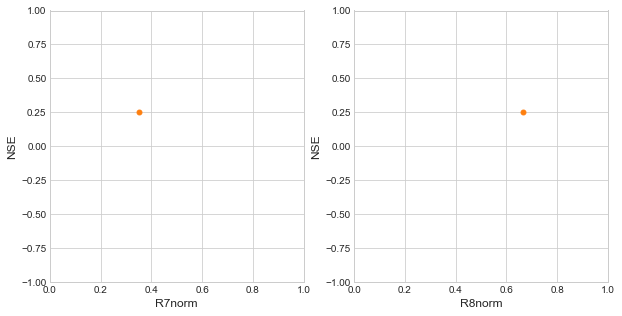

In [19]:
        # importar los valores calibrados de los parametros
        leer_SCEUA(ruta, 'Res-SCEUA_slow_' + met + '.txt')
        pars = leer_SCEUA.parametros
        print('NSE =', leer_SCEUA.resultados.Nash.max())
        # importar los archivos 'Calib.txt' originales
        calib = pd.read_csv(ruta + 'Calib_slow_' + met + '.txt', header=None)
        calib.index = ['FC' + str(i) for i in range(1, 10)] + ['FC0', 'Bnieve', 'DDF1', 'DDF2', 'Tb', 'Bppt', 'USLE1', 'USLE2', 'USLE3', 'p1', 'H3max']
        calib = calib[0]
        # modificar los valores de los parametros calibrados
        for FC in pars.index:
            if FC[0] == 'R':
                par_name = 'FC' + FC[1]
            elif FC[:3] == 'Cap':
                par_name = 'H3max'
            calib[par_name] = pars.loc[FC, 'optimo']
        # exportar el archivo 'Calib_'slow'.txt' modificado
        crear_calib(calib, ruta, 'slow', met)
        lanzar_SCEUA.calib = calib

In [20]:
    try:
        calib_slow = lanzar_SCEUA.calib
        #obs_slow = lanzar_SCEUA.obs
        #sim_slow = lanzar_SCEUA.sim
    except:
        print('No fue posible simular')
    print()

In [22]:
    # Paso 4. Calibracion caudal total
    # --------------------------------
    print('CALIBRACIÓN DEL CAUDAL TOTAL')
    print('----------------------------')
    # Definir parámetros del modelo
    calib_total = calib_quick.copy()
    calib_total[['FC7', 'FC8']] = calib_slow[['FC7', 'FC8']]
    crear_calib(calib_total, ruta, 'total', met)
    

CALIBRACIÓN DEL CAUDAL TOTAL
----------------------------


In [ ]:
    # Crear archivo de configuración de la calibración automática
    #crear_VarSCEUA(par_cal, ruta, 'total', met, start=start, OF=OF)
    varfile = 'Var-SCEUA_total_' + met + '.txt'
    copyfile(src + '/' + varfile, ruta + '/' + varfile)
    # Lanzar la calibración automática
    lanzar_SCEUA(ruta, 'total', met, scn)
    try:
        calib = lanzar_SCEUA.calib
        obs_total = lanzar_SCEUA.obs
        sim_total = lanzar_SCEUA.sim
    except:
        print('No fue posible simular')

Calibrando modelo: 1276 total_met2_SSH-0.6.tet


NSE = 0.8033


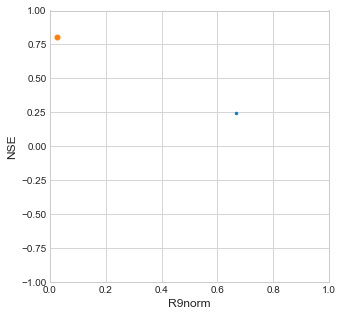

In [4]:
        # importar los valores calibrados de los parametros
        leer_SCEUA(ruta, 'Res-SCEUA_total_' + met + '.txt')
        pars = leer_SCEUA.parametros
        print('NSE =', leer_SCEUA.resultados.Nash.max())
        # importar los archivos 'Calib.txt' originales
        calib = pd.read_csv(ruta + 'Calib_total_' + met + '.txt', header=None)
        calib.index = ['FC' + str(i) for i in range(1, 10)] + ['FC0', 'Bnieve', 'DDF1', 'DDF2', 'Tb', 'Bppt', 'USLE1', 'USLE2', 'USLE3', 'p1', 'H3max']
        calib = calib[0]
        # modificar los valores de los parametros calibrados
        for FC in pars.index:
            if FC[0] == 'R':
                par_name = 'FC' + FC[1]
            elif FC[:3] == 'Cap':
                par_name = 'H3max'
            calib[par_name] = pars.loc[FC, 'optimo']
        # exportar el archivo 'Calib_'total'.txt' modificado
        crear_calib(calib, ruta, 'total', met)
        lanzar_SCEUA.calib = calib

In [5]:
calib

FC1            0.67736
FC2            0.69943
FC3            1.37299
FC4            7.95884
FC5            1.24904
FC6         1725.21399
FC7            0.35252
FC8        33345.72266
FC9            0.03822
FC0            1.00000
Bnieve         1.00000
DDF1           2.97877
DDF2           4.75730
Tb             2.60240
Bppt           0.00096
USLE1          1.00000
USLE2          1.00000
USLE3          1.00000
p1             1.96174
H3max     871183.87500
Name: 0, dtype: float64

In [ ]:
############
# MÉTODO 3 #
############        
elif met == 'met3':
    print('############')
    print('# MÉTODO 3 #')
    print('############')
    
    # Paso 1. Crear archivos del modelo
    # ---------------------------------
    crear_tet(ruta, stn, scn, met, flow='quick')
    crear_tet(ruta, stn, scn, met, flow='slow')
    crear_tet(ruta, stn, scn, met, flow='total')

    # Paso 2. Calibrar el caudal lento
    # --------------------------------
    print('CALIBRACIÓN DEL CAUDAL LENTO')
    print('----------------------------')
    # Definir parámetros del modelo
    crear_calib(calib, ruta, 'slow', met)
    # Crear archivo de configuración de la calibración automática
    #crear_VarSCEUA(par_cal, ruta, 'slow', met, start=start, OF=OF)
    varfile = 'Var-SCEUA_slow_' + met + '.txt'
    copyfile(src + '/' + varfile, ruta + '/' + varfile)
    # Lanzar la calibración automática
    lanzar_SCEUA(ruta, 'slow', met, scn)
    try:
        calib = lanzar_SCEUA.calib
        obs_slow = lanzar_SCEUA.obs
        sim_slow = lanzar_SCEUA.sim
    except:
        print('No fue posible simular')
    print()
        
    # Paso 3. Calibrar el caudal rápido
    # --------------------------------
    print('CALIBRACIÓN DEL CAUDAL RÁPIDO')
    print('-----------------------------')
    # Definir parámetros del modelo
    calib['FC6'] = np.nan # para dar el valor por defecto a 'FC6'
    crear_calib(calib, ruta, 'quick', met)
    # Crear archivo de configuración de la calibración automática
    #crear_VarSCEUA(par_cal, ruta, 'quick', met, start=start, OF=OF)
    varfile = 'Var-SCEUA_quick_' + met + '.txt'
    copyfile(src + '/' + varfile, ruta + '/' + varfile)
    # Lanzar la calibración automática
    lanzar_SCEUA(ruta, 'quick', met, scn)
    try:
        calib = lanzar_SCEUA.calib
        obs_quick = lanzar_SCEUA.obs
        sim_quick = lanzar_SCEUA.sim
    except:
        print('No fue posible simular')
    print()

    # Paso 4. Calibracion caudal total
    # --------------------------------
    print('CALIBRACIÓN DEL CAUDAL TOTAL')
    print('----------------------------')
    # Definir parámetros del modelo
    crear_calib(calib, ruta, 'total', met)
    # Crear archivo de configuración de la calibración automática
    #crear_VarSCEUA(par_cal, ruta, 'total', met, start=start, OF=OF)
    varfile = 'Var-SCEUA_total_' + met + '.txt'
    copyfile(src + '/' + varfile, ruta + '/' + varfile)
    # Lanzar la calibración automática
    lanzar_SCEUA(ruta, 'total', met, scn)
    try:
        calib = lanzar_SCEUA.calib
        obs_total = lanzar_SCEUA.obs
        sim_total = lanzar_SCEUA.sim
    except:
        print('No fue posible simular')

        

In [ ]:
############
# MÉTODO 4 #
############        
elif met == 'met4':
    print('############')
    print('# MÉTODO 4 #')
    print('############')
    
    # Paso 1. Crear archivos del modelo
    # ---------------------------------
    crear_tet(ruta, stn, scn, met, flow='quick')
    crear_tet(ruta, stn, scn, met, flow='total')

    # Paso 2. Calibrar el caudal rápido
    # ---------------------------------
    print('CALIBRACIÓN DEL CAUDAL RÁPIDO')
    print('-----------------------------')
    # Definir parámetros del modelo
    crear_calib(calib, ruta, 'quick', met)
    # Crear archivo de configuración de la calibración automática
    #crear_VarSCEUA(par_cal, ruta, 'quick', met, start=start, OF=OF)
    varfile = 'Var-SCEUA_quick_' + met + '.txt'
    copyfile(src + '/' + varfile, ruta + '/' + varfile)
    # Lanzar la calibración automática
    lanzar_SCEUA(ruta, 'quick', met, scn)
    try:
        calib = lanzar_SCEUA.calib
        obs_quick = lanzar_SCEUA.obs
        sim_quick = lanzar_SCEUA.sim
    except:
        print('No fue posible simular')
    print()

    # Paso 3. Calibracion caudal total
    # --------------------------------
    print('CALIBRACIÓN DEL CAUDAL TOTAL')
    print('----------------------------')
    # Crear archivo de calibración
    calib['FC8'] = np.nan # para dar el valor por defecto a 'FC8'
    crear_calib(calib, ruta, 'total', met)
    # Crear archivo de configuración de la calibración automática
    #crear_VarSCEUA(par_cal, ruta, 'total', met, start=start, OF=OF)
    varfile = 'Var-SCEUA_total_' + met + '.txt'
    copyfile(src + '/' + varfile, ruta + '/' + varfile)
    # Lanzar la calibración
    lanzar_SCEUA(ruta, 'total', met, scn)
    try:
        calib = lanzar_SCEUA.calib
        obs_total = lanzar_SCEUA.obs
        sim_total = lanzar_SCEUA.sim
    except:
        print('No fue posible simular')